Mean Squared Error: 12792513643.988827


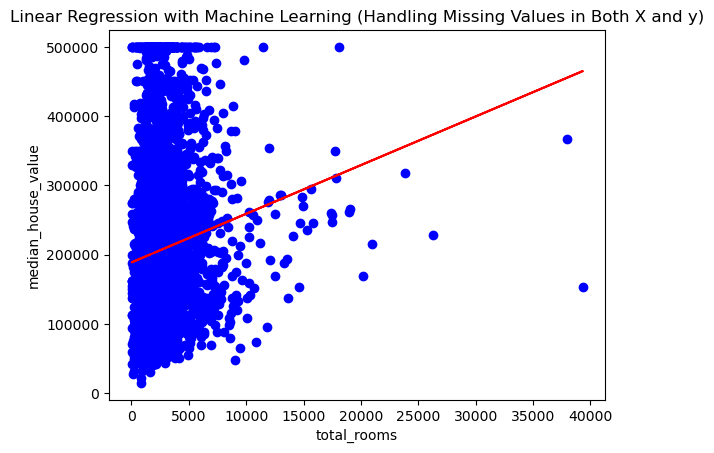

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the CSV dataset
dataset = pd.read_csv('housing.csv')

# Assuming your CSV has columns named 'total_rooms' and 'median_house_value'
X = dataset['total_rooms'].values.reshape(-1, 1)
y = dataset['median_house_value'].values.reshape(-1, 1)

# Handle missing values in the input variable X
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

# Handle missing values in the output variable y
imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = np.mean((predictions - y_test)**2)
print("Mean Squared Error:", mse)

# Plot the data and the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='red')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.title('Linear Regression with Machine Learning (Handling Missing Values in Both X and y)')
plt.show()


129/129 [==============================] - 0s 986us/step - loss: 27503308800.0000
Mean Squared Error: 27503308800.0
129/129 [==============================] - 0s 882us/step


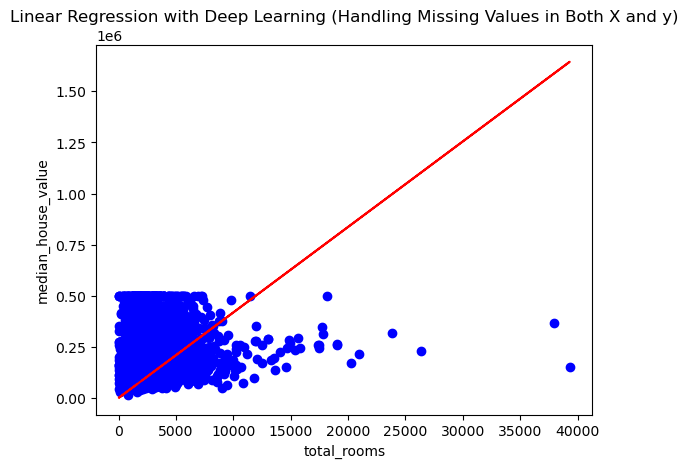

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the CSV dataset
dataset = pd.read_csv('housing.csv')

# Assuming your CSV has columns named 'total_rooms' and 'median_house_value'
X = dataset['total_rooms'].values.reshape(-1, 1)
y = dataset['median_house_value'].values.reshape(-1, 1)

# Handle missing values in both input X and output y
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the deep learning model for linear regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1)  # Single neuron for linear output
])

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

# Make predictions
predictions = model.predict(X_test)

# Plot the data and the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='red')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.title('Linear Regression with Deep Learning (Handling Missing Values in Both X and y)')
plt.show()


129/129 [==============================] - 0s 1ms/step - loss: 123383.9062
Mean Absolute Error: 123383.90625
129/129 [==============================] - 0s 789us/step


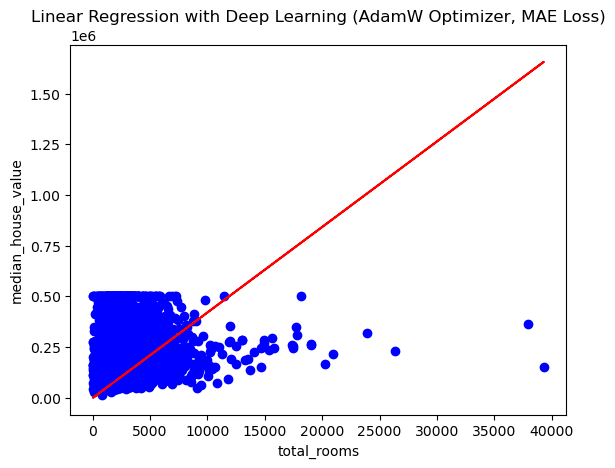

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import AdamW

# Load the CSV dataset
dataset = pd.read_csv('housing.csv')

# Assuming your CSV has columns named 'total_rooms' and 'median_house_value'
X = dataset['total_rooms'].values.reshape(-1, 1)
y = dataset['median_house_value'].values.reshape(-1, 1)

# Handle missing values in both input X and output y
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the deep learning model for linear regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1)  # Single neuron for linear output
])

# Compile the model
opt = AdamW(learning_rate=0.001)  # AdamW optimizer
model.compile(optimizer=opt, loss='mean_absolute_error')  # Mean Absolute Error (MAE) loss

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mse)

# Make predictions
predictions = model.predict(X_test)

# Plot the data and the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='red')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.title('Linear Regression with Deep Learning (AdamW Optimizer, MAE Loss)')
plt.show()


In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the CSV dataset
dataset = pd.read_csv('housing.csv')

# Features: total_rooms, bedrooms, households, median_income
X = dataset[['total_rooms', 'total_bedrooms', 'households', 'median_income']]
y = dataset['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

# Make predictions
predictions = model.predict(X_test_scaled)

# Plot predictions vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value')
plt.show()


KeyError: "['bedrooms'] not in index"